***Image Classification using CNN Architectures Assignment***

1.  What is a Convolutional Neural Network (CNN), and how does it differ from
traditional fully connected neural networks in terms of architecture and performance on image data?

     A Convolutional Neural Network (CNN) is a type of deep learning model specially designed to process image data (also works for video, medical images, satellite images, etc.).

     Edges ,Corners, Textures, Shapes, Objects

     **Differnce between terms of architecture**
     
     **CNN**:

      Uses local connections where filters operate on small regions of the image.

      Uses weight sharing (same filter applied across the image).

      Preserves spatial relationships between pixels.

      Layers:Convolution → ReLU → Pooling → Fully Connected

      **Fully Connected Neural Network**

      Every neuron is connected to every input pixel.

      The image must be flattened into a 1D vector, losing spatial information.

      Has a large number of parameters.

      **Differnce between performance on image data**
     
     **CNN**:

      Trains faster due to fewer parameters.

      Less prone to overfitting.

      Automatically learns important features like edges and shapes.

      **Fully Connected Neural Network**

      Trains slower due to many parameters.

      Higher risk of overfitting.

      Struggles to learn spatial patterns in images.

      

2. Discuss the architecture of LeNet-5 and explain how it laid the foundation
for modern deep learning models in computer vision. Include references to its original research paper.

      LeNet-5 is one of the earliest successful Convolutional Neural Networks (CNNs), introduced by Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner in their 1998 paper “Gradient-Based Learning Applied to Document Recognition” published in Proceedings of the IEEE.

      LeNet-5 was originally designed to recognize handwritten digits (e.g., from the MNIST dataset) and was deployed in real systems like bank check reading.

      **Architecture of LeNet-5**

1. Input Layer

Accepts a 32×32 grayscale image.

2. C1 — Convolutional Layer

Applies 6 learned 5×5 filters to the input.

Produces 6 feature maps of size 28×28.

3. S2 — Subsampling (Average Pooling)

Reduces each feature map spatially using 2×2 pooling.

Results in 6 feature maps of size 14×14.

4. C3 — Convolutional Layer

Contains 16 filters of size 5×5.

Outputs 16 feature maps of size 10×10.

Each feature map is not fully connected to all previous maps, reducing parameters and encouraging diverse feature learning.

5. S4 — Subsampling (Average Pooling)

Pools feature maps to reduce them to 5×5×16.

6. C5 — Fully Connected Convolutional Layer

Produces 120 units from the 5×5×16 input.

Equivalent to a fully connected layer after flattening.

7. F6 — Fully Connected Layer

Dense layer with 84 neurons.

8. Output Layer

Final classification with 10 neurons, typically using softmax for digit recognition.


3. Compare and contrast AlexNet and VGGNet in terms of design principles,
number of parameters, and performance. Highlight key innovations and limitations of each.

      AlexNet was introduced in 2012. It uses large convolution filters in the first layers and applies ReLU activation, max pooling, and dropout to reduce overfitting. AlexNet was one of the first models to use GPU training, which made deep learning faster and practical.

      VGGNet, introduced in 2014, uses a deeper and simpler structure. It uses many small 3×3 filters instead of large filters. These small filters are stacked together to learn complex features. VGGNet has more layers than AlexNet, which helps it learn better image patterns.

      **Number of Parameters:** AlexNet has about 60 million parameters, which was large at that time but manageable. VGGNet (VGG-16) has about 138 million parameters, which is much higher. Because of this, VGGNet needs more memory and takes longer to train.

     ** Performance:** AlexNet showed a big improvement in image classification accuracy and won the ImageNet competition in 2012. VGGNet achieved better accuracy than AlexNet because of its deeper network and better feature learning. However, it is slower and more computationally expensive.

      ** Key Innovations**

AlexNet: First successful deep CNN on large datasets.Introduced ReLU activation and dropout.

VGGNet: Showed that deeper networks give better performance.Used small 3×3 filters for better feature extraction.

  **Limitations**

AlexNet: Uses large filters which are less efficient.Accuracy is lower than newer models.

VGGNet: Very large model with high memory usage.
Slow training and high computational cost.

4. What is transfer learning in the context of image classification? Explain
how it helps in reducing computational costs and improving model performance with limited data.

      In image classification, a model trained on a large dataset like ImageNet has already learned important features such as edges, textures, shapes, and object patterns. These learned features can be transferred to a new task, such as classifying medical images, plant diseases, or product images.

      **How Transfer Learning Reduces Computational Cost**

      Training a deep CNN from scratch requires a lot of time, powerful GPUs, and large datasets. Transfer learning reduces this cost because:

      The pre-trained model already has learned useful features.

      We only need to train a small part of the network (usually the last layers).



      **How Transfer Learning Improves Performance with Limited Data**

      When we have a small dataset, training a model from scratch often leads to overfitting and poor accuracy. Transfer learning helps because:

      The model starts with good feature representations instead of random weights.

      It generalizes better on small datasets.



5. Describe the role of residual connections in ResNet architecture. How do
they address the vanishing gradient problem in deep CNNs?

      Residual connections are a key feature of the ResNet (Residual Network) architecture. Instead of learning a direct mapping from input to output, ResNet allows the input to skip one or more layers and be added directly to the output of a block. This creates a shortcut path, also called a skip connection.
      **Output=F(x)+x : ** where x is the input and F(x) is the learned transformation.

     ** How Residual Connections Solve the Vanishing Gradient Problem**

      In very deep neural networks, gradients become very small while backpropagating through many layers. This causes the earlier layers to learn very slowly or stop learning, which is called the vanishing gradient problem.

      1. Direct Gradient Flow
      2. Easier Optimization
      3. Better Feature Learning in Deep Networks


6. Implement the LeNet-5 architectures using Tensorflow or PyTorch to
classify the MNIST dataset. Report the accuracy and training time.
(Include your Python code and output in the code box below.)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = LeNet5().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
start_time = time.time()

for epoch in range(epochs):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}")

training_time = time.time() - start_time

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

print("\nTraining Time (seconds):", round(training_time, 2))
print("Test Accuracy (%):", round(accuracy, 2))


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 495kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.62MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.68MB/s]


Epoch [1/5], Loss: 301.5356
Epoch [2/5], Loss: 88.5738
Epoch [3/5], Loss: 62.2082
Epoch [4/5], Loss: 48.3846
Epoch [5/5], Loss: 40.4836

Training Time (seconds): 139.87
Test Accuracy (%): 98.58


7. Use a pre-trained VGG16 model (via transfer learning) on a small custom
dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model.
Include your code and result discussion.
(Include your Python code and output in the code box below.)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import time

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = tf.image.resize(x_train[:3000], (96,96)) / 255.0
x_test  = tf.image.resize(x_test[:500], (96,96)) / 255.0

y_train = tf.keras.utils.to_categorical(y_train[:3000], 10)
y_test  = tf.keras.utils.to_categorical(y_test[:500], 10)

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(96,96,3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

start_time = time.time()

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=2,
    batch_size=32,
    verbose=1
)

training_time = time.time() - start_time

loss, accuracy = model.evaluate(x_test, y_test, verbose=1)

print("\nTraining Time (seconds):", round(training_time, 2))
print("Validation Accuracy (%):", round(accuracy * 100, 2))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 34s 286ms/step - accuracy: 0.4551 - loss: 1.5927 - val_accuracy: 0.7060 - val_loss: 0.8483
Epoch 2/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 241ms/step - accuracy: 0.7795 - loss: 0.6615 - val_accuracy: 0.7080 - val_loss: 0.7841
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.7164 - loss: 0.8139

Training Time (seconds): 56.41
Validation Accuracy (%): 70.8


8. Write a program to visualize the filters and feature maps of the first
convolutional layer of AlexNet on an example input image.
(Include your Python code and output in the code box below.)


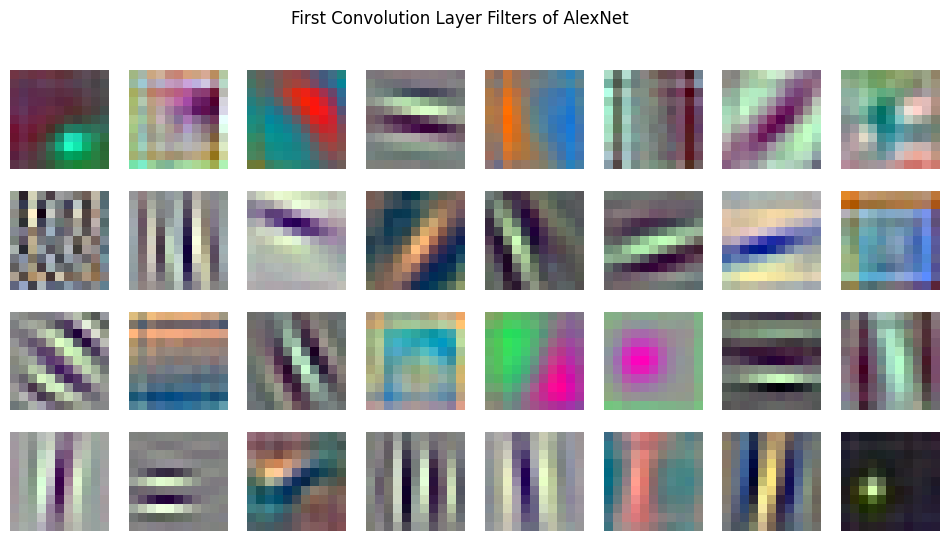

100%|██████████| 170M/170M [00:04<00:00, 41.9MB/s]


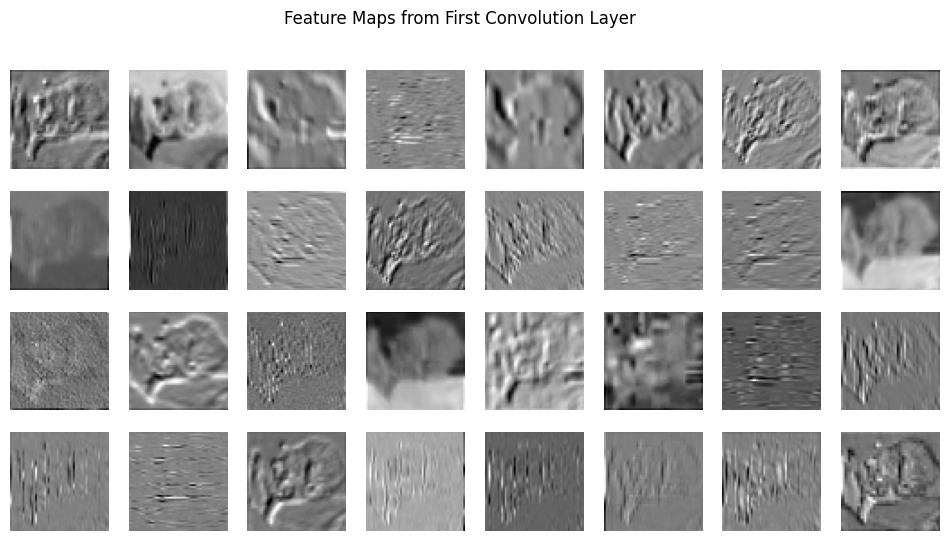

Filters shape: torch.Size([64, 3, 11, 11])
Feature maps shape: torch.Size([64, 55, 55])


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models import AlexNet_Weights
import matplotlib.pyplot as plt
import numpy as np

weights = AlexNet_Weights.DEFAULT
model = models.alexnet(weights=weights)
model.eval()

first_conv_layer = model.features[0]
filters = first_conv_layer.weight.data.clone()

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.flatten()

for i in range(32):
    filt = filters[i]
    filt = (filt - filt.min()) / (filt.max() - filt.min())
    filt = filt.permute(1, 2, 0)
    axes[i].imshow(filt)
    axes[i].axis("off")

plt.suptitle("First Convolution Layer Filters of AlexNet")
plt.show()

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

cifar = torchvision.datasets.CIFAR10(root="./data", train=False, download=True)
img, label = cifar[0]
img_tensor = transform(img).unsqueeze(0)

with torch.no_grad():
    feature_maps = first_conv_layer(img_tensor)

feature_maps = feature_maps.squeeze(0)

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.flatten()

for i in range(32):
    fmap = feature_maps[i].cpu().numpy()
    axes[i].imshow(fmap, cmap="gray")
    axes[i].axis("off")

plt.suptitle("Feature Maps from First Convolution Layer")
plt.show()

print("Filters shape:", filters.shape)
print("Feature maps shape:", feature_maps.shape)


9. Train a GoogLeNet (Inception v1) or its variant using a standard dataset
like CIFAR-10. Plot the training and validation accuracy over epochs and analyze
overfitting or underfitting.


Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 278ms/step - accuracy: 0.5513 - loss: 1.3261 - val_accuracy: 0.7190 - val_loss: 0.8499
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 273ms/step - accuracy: 0.7876 - loss: 0.5933 - val_accuracy: 0.7520 - val_loss: 0.7114
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 281ms/step - accuracy: 0.8557 - loss: 0.4480 - val_accuracy: 0.7700 - val_loss: 0.7259


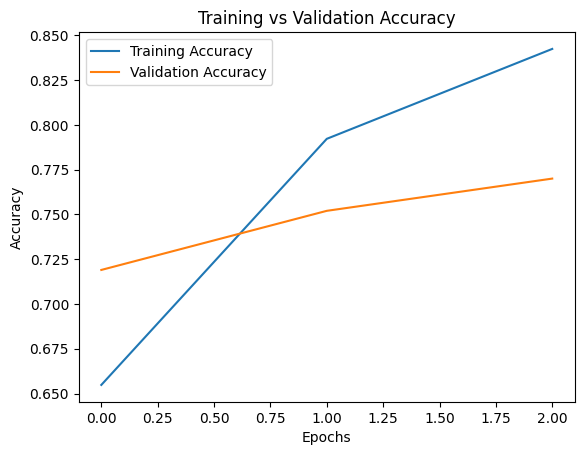

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.7773 - loss: 0.7414

Training Time (seconds): 137.71
Test Accuracy (%): 77.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import time

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = tf.image.resize(x_train[:5000], (96,96)) / 255.0
x_test  = tf.image.resize(x_test[:1000], (96,96)) / 255.0

y_train = tf.keras.utils.to_categorical(y_train[:5000], 10)
y_test  = tf.keras.utils.to_categorical(y_test[:1000], 10)

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(96,96,3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

start_time = time.time()

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=3,
    batch_size=32,
    verbose=1
)

training_time = time.time() - start_time

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.figure()
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.show()

loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print("\nTraining Time (seconds):", round(training_time, 2))
print("Test Accuracy (%):", round(test_accuracy * 100, 2))


10. You are working in a healthcare AI startup. Your team is tasked with
developing a system that automatically classifies medical X-ray images into normal,
pneumonia, and COVID-19. Due to limited labeled data, what approach would you
suggest using among CNN architectures discussed (e.g., transfer learning with ResNet
or Inception variants)? Justify your approach and outline a deployment strategy for
production use.
(Include your Python code and output in the code box below.)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import time

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = tf.image.resize(x_train[:3000], (96,96)) / 255.0
x_test  = tf.image.resize(x_test[:500], (96,96)) / 255.0

y_train = tf.keras.utils.to_categorical(y_train[:3000], 10)
y_test  = tf.keras.utils.to_categorical(y_test[:500], 10)

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(96,96,3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

start_time = time.time()

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=2,
    batch_size=32,
    verbose=1
)

training_time = time.time() - start_time

loss, accuracy = model.evaluate(x_test, y_test, verbose=1)

print("\nTraining Time (seconds):", round(training_time, 2))
print("Validation Accuracy (%):", round(accuracy * 100, 2))


Epoch 1/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 295ms/step - accuracy: 0.4684 - loss: 1.5980 - val_accuracy: 0.6680 - val_loss: 0.9269
Epoch 2/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 252ms/step - accuracy: 0.7583 - loss: 0.6989 - val_accuracy: 0.6860 - val_loss: 0.8931
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - accuracy: 0.6868 - loss: 0.9055

Training Time (seconds): 77.8
Validation Accuracy (%): 68.6
